<a href="https://colab.research.google.com/github/ferrazzijk/Data-Industry-Salary-Prediction/blob/main/08_Data_Industry_Salary_Prediction_Best_Performing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The purpose of this project is to determine which data analysis skills are associated with higher salaries. We will use data scraped from [Glassdoor](https://www.glassdoor.com/member/home/index.htm). This file contains the model building and testing portions for the first 4 dataframes of the project. To view the scraping files of each role, please select the respective link in the Job Titles list. To view scraping exploration or the exploratory data analysis notebooks, please select the respective link from additional links.

**Job Titles:**
*   [Data Analyst](https://colab.research.google.com/drive/1AW0rNTs84Cq7GrJiDq86WWCisB4q6ZwO?usp=sharing)
*   [Business Analyst](https://colab.research.google.com/drive/1I1lolzuZgoUZGBwAEP9hZNf7my8XItbz?usp=sharing)
*   [Data Engineer](https://colab.research.google.com/drive/18HMhZXcv4xwxDUXGDauYEGdnDJLjNYxf?usp=sharing)
*   [Data Scientist](https://colab.research.google.com/drive/1i8UQMiObiOKAyzlrAsFCBPitqIh90Y5O?usp=sharing)

**Locations**
*   Austin, TX
*   Boston, MA
*   Chicago, IL
*   Colorado
*   Los Angeles, CA
*   New York City, NY
*   San Francisco, CA
*   Seattle, WA

**Additional Links**
*    [Scraping Exploration](https://colab.research.google.com/drive/1K1VMiRG_wzVm0wBSyBHoJJ77rSpZM-wf?usp=sharing)
*    [Exploratory Data Analysis](https://colab.research.google.com/drive/1lDlqmcv6xav48C5uj2YLJwK5UJ3BNYET?usp=sharing)
*    [Model Building & Testing Part 1](https://colab.research.google.com/drive/17wVHuX5pFcVi2V_r_11FdT1pVpzP8Dnw?usp=sharing)
*    [Model Building & Testing Part 2](https://colab.research.google.com/drive/1AyO8kZANyqWAacCn7Odrt5DhW9ZkAZEU?usp=sharing)

## **Set Environment**

In [ ]:
#set environment
!pip install flask-ngrok

import collections
import IPython.display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import scipy.stats as stats
import seaborn as sns
import spacy
import statsmodels.api as sm
import string
import textwrap

from bs4 import BeautifulSoup as soup
from collections import Counter
from flask import Flask
from flask_ngrok import run_with_ngrok
from IPython.core.display import clear_output
from IPython.display import display
from nltk.corpus import stopwords
from random import randint
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import text
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost.sklearn import XGBRegressor
from statsmodels.tools.eval_measures import mse, rmse
from time import time, sleep
from wordcloud import WordCloud

nltk.download('stopwords')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We had 8 Dataframe's to test models on (developed in EDA notebook).

*   **all_jobs:** numeric data of extrapolated from the job descriptions. 5631 rows × 88 columns
*   **all_jobs_yrs_df**: all_jobs excluding jobs that did not have years of experience listed. 4696 rows × 88 columns
*   **all_jobs_no_outliers_df:** numeric data of extrapolated from the job descriptions, outliers removed. 5569 rows × 88 columns
*   **all_jobs_yrs_no_outliers_df**: ll_jobs excluding jobs that did not have years of experience listed, outliers removed. 4644 rows × 88 columns
*   **categories_df:** numeric data of combined sums of the categories we extrapolated from the job descriptions. 4696 rows × 16 columns
*   **yrs_exp_df**: categories excluding jobs that did not have years of experience listed. 1711 rows × 16 columns
*   **cat_no_outliers_df:** numeric data of combined sums of the categories we extrapolated from the job descriptions, outliers removed. 5569 rows × 16 columns
*   **yrs_exp_no_outliers_df**: categories excluding jobs that did not have years of experience listed, outliers removed. 4644 rows × 16 columns

For performance comparison, each was tested with target variable as:
*    **Average Salary**
*    **Log of Average Salary**

Below are screenshots of the model comparisions. If you'd like to view the results comparisons as a Google Sheet, please click [here](https://docs.google.com/spreadsheets/d/14FPDNM7JX2RcQNZuKsFH74OuCWrWMAqn6U7qR22ELqM/edit?usp=sharing).

**[All Jobs Results](https://drive.google.com/file/d/1jhuAnwk_OQvAl8hPK4sFnBlMZqFHY1Da/view?usp=sharing)**
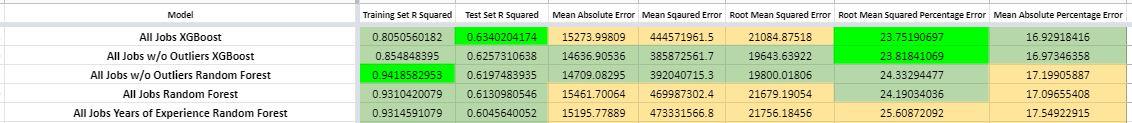

**[All Jobs Results Log(y)](https://drive.google.com/file/d/1oko_qO1QRyvvY3XRBxKSeCoO73SLweeX/view?usp=sharing)**
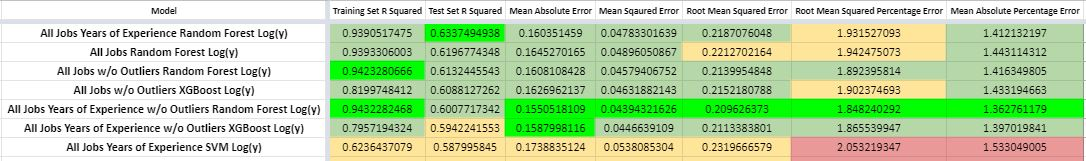

**[Categorical Jobs](https://drive.google.com/file/d/1wzW1-VigpnmRl0AVunp3pc0JKYR9-u2R/view?usp=sharing)**
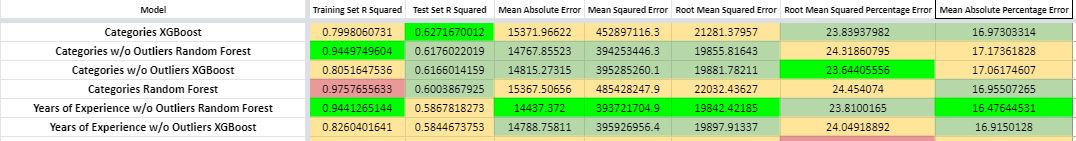

**[Categorical Jobs Log(y)](https://drive.google.com/file/d/1aHa-CDFTE5v8_641HCJCRkS5po6KEuOx/view?usp=sharing)**
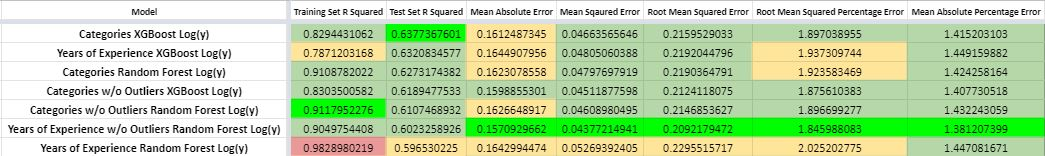

While the Log of Average Salary models generally performed better than the Average Salary models, the disadvantage of predicting a log-transformed value instead of an actual salary. Plus the increase in performance is only 2% more explained variance than the Average Salary models. Furthermore the all jobs models performed slightly better than the categorical jobs, but not enough to make it worth utilizing an all jobs model as the best model and making a user fill out 90 variables in an application. Therefore, the best performing model was the XGBoost Model performed on the categories_df dataframe. 

This mode explained almost 63% of variance of the data around the mean, as well as having relatively low Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Root Mean Square Percentage Error, and Mean Abosulte Percentage Error. While this model didnt have one of the lowest Root Mean Squared Error's, it does have one of the lowest Roote Mean Squared Percentage Errors. 

With the Root Mean Squared Percent Error (RMSPE), you have somewhat more of an idea of the magnitude of the error in relation to the actual values.

To give an example, let’s say the mean of the actual values is 10,000, and the RMSE is 1,000. The RMSPE in this case might be 10%, and this 10% gives you an idea of the error in relation to the mean of the actual values.

### **Import Created Databases**

In [ ]:
categories_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/categories_df.csv?dl=0')
categories_df.drop(columns=['Unnamed: 0', 'log_avg_sal'], inplace=True)
categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5,3.9,6,3,109500.0,5,1,0,1,1,1,2,2,4,0
5627,12,4.4,6,3,188000.0,10,0,2,2,0,1,1,1,3,1
5628,8,4.3,6,3,40500.0,1,1,0,1,0,0,0,0,0,0
5629,12,4.1,6,3,143500.0,7,1,0,1,0,0,0,0,5,0


### **Visualization of Target Variable**

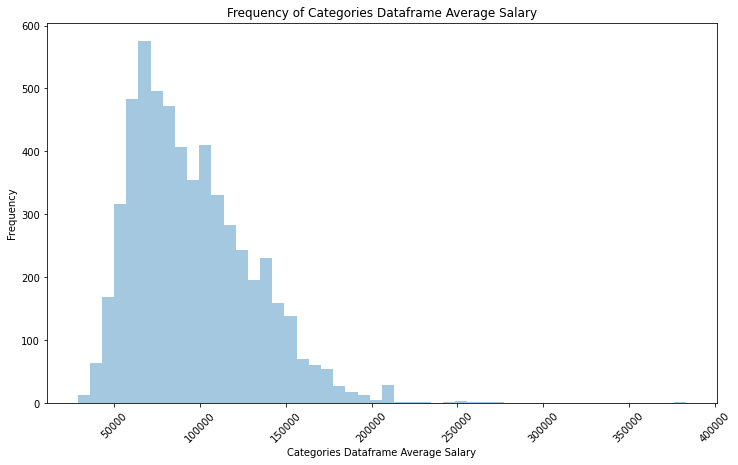

In [ ]:
#visualize Categories Dataframe Average Salary
plt.figure(figsize = (12,7))
sns.distplot(categories_df['avg_sal'], kde = False)
plt.xlabel('Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Categories Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

## **XGBoost**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#convert X_train & X_test to array for model deployment later
X_train = np.array(X_train)
X_test = np.array(X_test)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
  
# categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
#                         n_jobs = 5, verbose=True)
# # fitting the model for grid search 
# categories_xgb_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(categories_xgb_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(categories_xgb_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
categories_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

categories_xgb.fit(X_train, y_train)

#cross validate
categories_xgb_scores = cross_val_score(categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.59684666 0.57695488 0.55227868 0.54801748 0.56620106]
Mean Cross Validation Score: 0.568059752166836906539515439362731


In [ ]:
#generate predictions
categories_xgb_preds = categories_xgb.predict(X_test)

#more performance metrics
categories_xgb_rsquared_train = categories_xgb.score(X_train, y_train)
categories_xgb_rsquared_test = categories_xgb.score(X_test, y_test)
categories_xgb_mae = mean_absolute_error(y_test, categories_xgb_preds)
categories_xgb_mse = mse(y_test, categories_xgb_preds)
categories_xgb_rmse = rmse(y_test, categories_xgb_preds)
categories_xgb_mape = np.mean(np.abs((y_test - categories_xgb_preds)/y_test)*100)
categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_xgb_preds) / y_test)))) * 100
categories_xgb_model_name = 'Categories XGBoost'

#create easily readable display of performance metrics
categories_xgb_dictionary = {'Model': categories_xgb_model_name,
  'Training Set R Squared': categories_xgb_rsquared_train, 
  'Test Set R Squared': categories_xgb_rsquared_test, 'Mean Absolute Error': categories_xgb_mae, 
  'Mean Sqaured Error': categories_xgb_mse, 'Root Mean Squared Error': categories_xgb_rmse,
  'Root Mean Squared Percentage Error': categories_xgb_rmspe,
  'Mean Absolute Percentage Error': categories_xgb_mape}

categories_xgb_df = pd.DataFrame(categories_xgb_dictionary, index=[0])

categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost,0.799806,0.627167,15371.966216,4.528971e+08,21281.379568,23.83938,16.973033


In [ ]:
categories_df.columns

Index(['industry', 'rank', 'search_city', 'search_job', 'avg_sal', 'years_exp',
       'degrees_total', 'sen_job_titles_total', 'languages_total',
       'visualization_total', 'big_data_total', 'cloud_total',
       'platform_total', 'ds_concepts_total', 'deep_learning_totals'],
      dtype='object')

In [ ]:
categories_df['cloud_total'].unique()

array([0, 1, 2, 4, 3, 5, 6, 7])

#**Deployment of Model** <a name="18"></a>

**Please use the following lists to sum the amount of items that appear in a job posting from each variable's list.**



*   **degrees_total** = Associates, Bachelors, Masters, Doctorates
*    **sen_job_titles_total** =  senior , lead , principal , manager 
*   **languages_total** = bash, cplusplus,html, java, javascript, julia, matlab,
oracle, python, r , ruby, sas, scala, sql
*    **visualization_total** = dashboard, data studio, looker, power bi, sisense, tableau 
*    **big_data_total** = airflow, big data, bigquery, cassandra, docker, etl, hadoop,
 hbase, hdfs, hive, impala, kafka, kubeflow, kubernetes 
*    **cloud_total** = aws, azure, dynamodb, ec2, gcp, google cloud, lambda, mongodb,
 redshift, s3, saas, snowflake 
*    **platform_total** = google analytics, google sheets, linux, microsoft, microsoft excel, powerpoint, salesforce
*    **ds_concepts_total** = artificial intelligence/ai, ajax, api, etl, forecasting, hypothesis testing, json, kpi, ml/machine learning, nlp/natural language processing, pipeline, predictive, regression, statistical, time series
*    **deep_learning_totals** = apache, keras, neural, spark, tensorflow





In [ ]:
categories_df.columns

Index(['industry', 'rank', 'search_city', 'search_job', 'avg_sal', 'years_exp',
       'degrees_total', 'sen_job_titles_total', 'languages_total',
       'visualization_total', 'big_data_total', 'cloud_total',
       'platform_total', 'ds_concepts_total', 'deep_learning_totals'],
      dtype='object')

##**Create user based form to ingest data of all features from a user.** <a name="19"></a>

In [ ]:
#@title Predict Data Industry Salary

industry = "Accounting_Legal" #@param ["Accounting_Legal", "Aerospace_Defense", "Agriculture_Forestry", "Arts_Entertainment_Recreation", "Biotech_Pharmaceuticals", "Business_Services", "Construction_Repair_Maintenance", "Consumer_Services", "Education", "Finance", "Government", "Health_Care", "Information_Technology", "Insurance", "Manufacturing", "Media", "Mining_Metals", "Non_Profit", "Oil_Gas_Energy_Utilities", "Real_Estate", "Restaurants_Bars_Food_Services", "Retail", "Telecommunications", "Transportation_Logistics", "Travel_Tourism"]
if 'Accounting_Legal':
  industry = 0
elif 'Aerospace_Defense':
  industry = 1
elif'Agriculture_Forestry':
  industry = 2
elif'Arts_Entertainment_Recreation':
  industry = 3
elif'Biotech_Pharmaceuticals':
  industry = 4
elif'Business Services':
  industry = 5
elif'Construction_Repair_Maintenance':
  industry = 6
elif'Consumer_Services':
  industry = 7
elif'Education':
  industry = 8
elif'Finance':
  industry = 9
elif'Government':
  industry = 10
elif'Health Care':
  industry = 11
elif'Information_Technology':
  industry = 12
elif'Insurance':
  industry = 13
elif'Manufacturing':
  industry = 14
elif'Media':
  industry = 15
elif'Mining_Metals':
  industry = 16
elif'Non_Profit':
  industry = 17
elif'Oil_Gas_Energy_Utilities':
  industry = 18
elif'Real_Estate':
  industry = 19
elif'Restaurants_Bars_Food_Services':
  industry = 20
elif'Retail':
  industry = 21
elif'Telecommunications':
  industry = 22
elif'Transportation_Logistics':
  industry = 23
elif'Travel_Tourism':
  industry = 24

rank = 2.33 #@param {type:"slider", min:0, max:5, step:0.01}

search_city = "Chicago" #@param ["Austin", "Boston", "Chicago", "Colorado", "Los Angeles", "New York", "Seattle", "San Francisco"]
if 'Austin':
  search_city = 0
elif 'Boston':
  search_city = 1
elif 'Chicago':
  search_city = 2
elif 'Colorado':
  search_city = 3
elif 'Los Angeles':
  search_city = 4
elif 'New York':
  search_city = 5
elif 'Seattle':
  search_city = 6
elif 'San Francisco':
  search_city = 7

search_job = "Data Analyst" #@param ["Data Analyst", "Data Engineer", "Business Analyst", "Data Scientist"]
if 'Data Analyst':
  search_job = 1
elif 'Data Engineer':
  search_job = 2
elif 'Business Analyst':
  search_job = 0
elif 'Data Scientist':
  search_job = 3

years_exp = "4" #@param ["Not_Listed", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
if 'Not Listed':
  years_exp = -1
elif '1':
  years_exp = 1
elif '2':
  years_exp = 2
elif '3':
  years_exp = 3
elif '4':
  years_exp = 4
elif '5':
  years_exp = 5
elif '6':
  years_exp = 6
elif '7':
  years_exp = 7
elif '8':
  years_exp = 8
elif '9':
  years_exp = 9
elif '10':
  years_exp = 10

degrees_total = "1" #@param ["0", "1", "2", "3", "4"]
if '0':
  degrees_total = 0
elif '1':
  degrees_total= 1
elif '2':
  degrees_total= 2
elif '3':
  degrees_total= 3
elif '4':
  degrees_total= 4

sen_job_titles_total = "2" #@param ["0", "1", "2", "3", "4"]
if '0':
  sen_job_titles_total = 0
elif '1':
  sen_job_titles_total = 1
elif '2':
  sen_job_titles_total = 2
elif '3':
  sen_job_titles_total = 3
elif '4':
  sen_job_titles_total = 4

languages_total = "4" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]
if '0':
  languages_total = 0
elif '1':
  languages_total = 1
elif '2':
  languages_total = 2
elif '3':
  languages_total = 3
elif '4':
  languages_total = 4
elif '5':
  languages_total = 5
elif '6':
  languages_total = 6
elif '7':
  languages_total = 7
elif '8':
  languages_total = 8
elif '9':
  languages_total = 9
elif '10':
  languages_total = 10
elif '11':
  languages_total = 11
elif '12':
  languages_total = 12
elif '13':
  languages_total = 13
elif '14':
  languages_total = 14

visualization_total = "3" #@param ["0", "1", "2", "3", "4", "5", "6"]
if '0':
  visualization_total = 0
elif '1':
  visualization_total = 1
elif '2':
  visualization_total = 2
elif '3':
  visualization_total = 3
elif '4':
  visualization_total = 4
elif '5':
  visualization_total = 5
elif '6':
  visualization_total = 6

big_data_total = "4" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]
if '0':
  big_data_total =  0
elif '1':
  big_data_total =  1
elif '2':
  big_data_total =  2
elif '3':
  big_data_total =  3
elif '4':
  big_data_total =  4
elif '5':
  big_data_total =  5
elif '6':
  big_data_total =  6
elif '7':
  big_data_total =  7
elif '8':
  big_data_total =  8
elif '9':
  big_data_total =  9
elif '10':
  big_data_total =  10
elif '11':
  big_data_total =  11
elif '12':
  big_data_total =  12
elif '13':
  big_data_total =  13
elif '14':
  big_data_total =  14

cloud_total = "4" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
if '0':
  cloud_total = 0
elif '1':
  cloud_total = 1
elif '2':
  cloud_total = 2
elif '3':
  cloud_total = 3
elif '4':
  cloud_total = 4
elif '5':
  cloud_total = 5
elif '6':
  cloud_total = 6
elif '7':
  cloud_total = 7
elif '8':
  cloud_total = 8
elif '9':
  cloud_total = 9
elif '10':
  cloud_total = 10
elif '11':
  cloud_total = 11
elif '12':
  cloud_total = 12

platform_total = "3" #@param ["0", "1", "2", "3", "4", "5", "6", "7"]
if '0':
  platform_total = 0
elif '1':
  platform_total = 1
elif '2':
  platform_total = 2
elif '3':
  platform_total = 3
elif '4':
  platform_total = 4
elif '5':
  platform_total = 5
elif '6':
  platform_total = 6
elif '7':
  platform_total = 7

ds_concepts_total = "10" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
if '0':
  ds_concepts_total = 0
elif '1':
  ds_concepts_total = 1
elif '2':
  ds_concepts_total = 2
elif '3':
  ds_concepts_total = 3
elif '4':
  ds_concepts_total = 4
elif '5':
  ds_concepts_total = 5
elif '6':
  ds_concepts_total = 6
elif '7':
  ds_concepts_total = 7
elif '8':
  ds_concepts_total = 8
elif '9':
  ds_concepts_total = 9
elif '10':
  ds_concepts_total = 10
elif '11':
  ds_concepts_total = 11
elif '12':
  ds_concepts_total = 12
elif '13':
  ds_concepts_total = 13
elif '14':
  ds_concepts_total = 14
elif '15':
  ds_concepts_total = 15

deep_learning_totals = "3" #@param ["0", "1", "2", "3", "4", "5"]
if '0':
  deep_learning_totals = 0
elif '1':
  deep_learning_totals = 1
elif '2':
  deep_learning_totals = 2
elif '3':
  deep_learning_totals = 3
elif '4':
  deep_learning_totals = 4
elif '5':
  deep_learning_totals = 5

In [ ]:
#Calculate results from user submitted form. 

#define a submit button
button = widgets.Button(description='Submit')

#define outout
output = widgets.Output()

#define a function to interpret user results and make prediction through model
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    #define input
    new_input = [[industry, rank, search_city, search_job, years_exp,degrees_total, 
                  sen_job_titles_total, languages_total,visualization_total, 
                  big_data_total, cloud_total,platform_total, ds_concepts_total, 
                  deep_learning_totals]]

    #pass new input through xgb model
    new_output = categories_xgb.predict(new_input)
    #display predicted salary
    print('The predicted salary is: ', new_output)

#run function
button.on_click(on_button_clicked)
display(button, output)

Button(description='Submit', style=ButtonStyle())

Output()